In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load Fashion MNIST Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
# Class labels
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

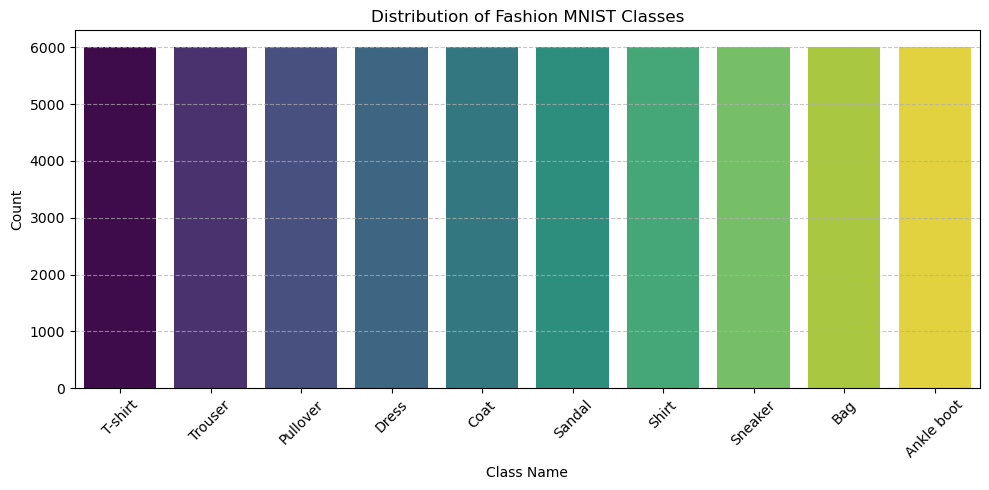

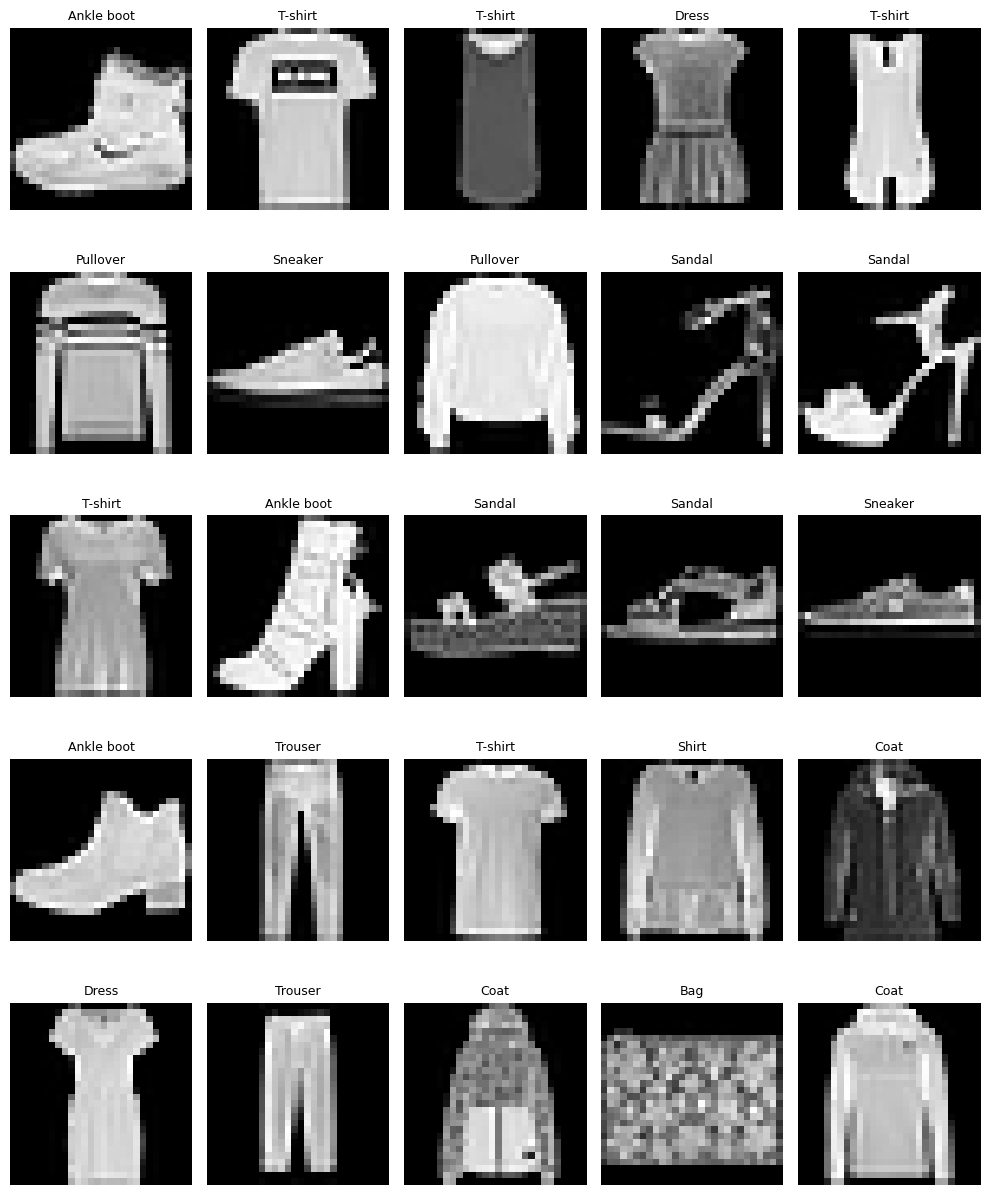

In [4]:

# Plot label distribution
def plot_label_distribution(labels, class_names):
    plt.figure(figsize=(10, 5))
    sns.countplot(x=labels, hue=labels, palette="viridis", legend=False)
    plt.xticks(np.arange(10), class_names, rotation=45)
    plt.title("Distribution of Fashion MNIST Classes")
    plt.xlabel("Class Name")
    plt.ylabel("Count")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot sample images
def plot_fashion_mnist(images, labels, class_names, rows=5, cols=5):
    plt.figure(figsize=(2 * cols, 2.5 * rows))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(class_names[labels[i]], fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_label_distribution(y_train, class_names)
plot_fashion_mnist(x_train, y_train, class_names)

In [5]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Flatten input images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [6]:
def create_model():
    initializer = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05)
    model = models.Sequential([
        layers.Input(shape=(784,)),
        layers.Dense(512, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.4),

        layers.Dense(256, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(128, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(64, kernel_initializer=initializer),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.1),

        layers.Dense(10, activation='softmax')
    ])
    return model

In [7]:
model = create_model()
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 578,890 (2.21 MB)

 Trainable params: 576,970 (2.20 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [9]:
# Train the model
history = model.fit(x_train, y_train, validation_split=0.2,
                    epochs=20, batch_size=128, verbose=2)

Epoch 1/20
375/375 - 20s - 53ms/step - accuracy: 0.7799 - loss: 0.6468 - val_accuracy: 0.8428 - val_loss: 0.4335
Epoch 2/20
375/375 - 11s - 31ms/step - accuracy: 0.8418 - loss: 0.4446 - val_accuracy: 0.8593 - val_loss: 0.3883
Epoch 3/20
375/375 - 10s - 27ms/step - accuracy: 0.8565 - loss: 0.4027 - val_accuracy: 0.8645 - val_loss: 0.3660
Epoch 4/20
375/375 - 11s - 30ms/step - accuracy: 0.8622 - loss: 0.3821 - val_accuracy: 0.8733 - val_loss: 0.3485
Epoch 5/20
375/375 - 16s - 43ms/step - accuracy: 0.8706 - loss: 0.3578 - val_accuracy: 0.8755 - val_loss: 0.3396
Epoch 6/20
375/375 - 7s - 18ms/step - accuracy: 0.8741 - loss: 0.3432 - val_accuracy: 0.8754 - val_loss: 0.3419
Epoch 7/20
375/375 - 7s - 19ms/step - accuracy: 0.8778 - loss: 0.3328 - val_accuracy: 0.8796 - val_loss: 0.3312
Epoch 8/20
375/375 - 7s - 18ms/step - accuracy: 0.8814 - loss: 0.3232 - val_accuracy: 0.8814 - val_loss: 0.3259
Epoch 9/20
375/375 - 7s - 18ms/step - accuracy: 0.8877 - loss: 0.3091 - val_accuracy: 0.8733 - val_

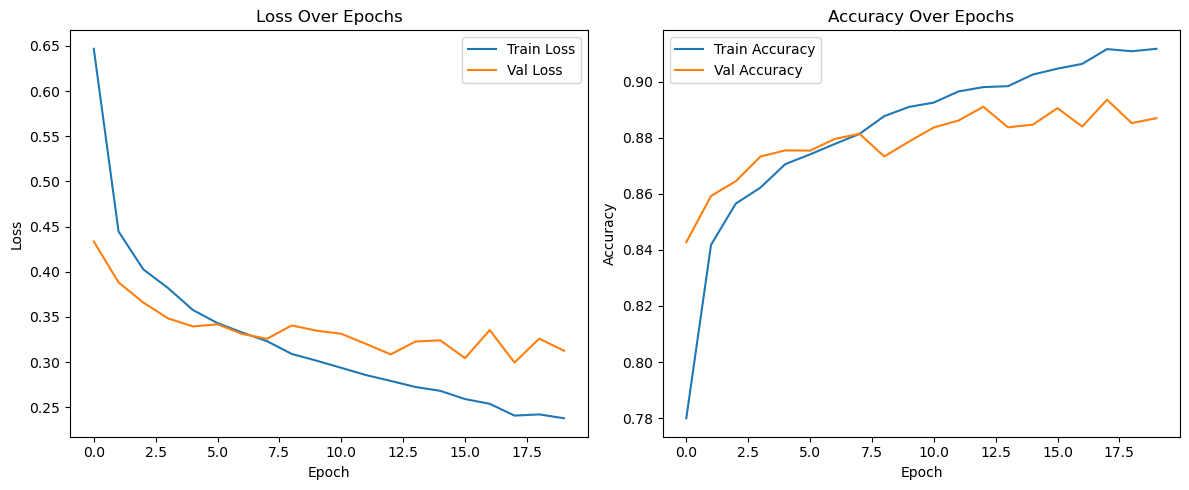

In [10]:
# Plot Training History
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)

In [11]:
# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8787


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


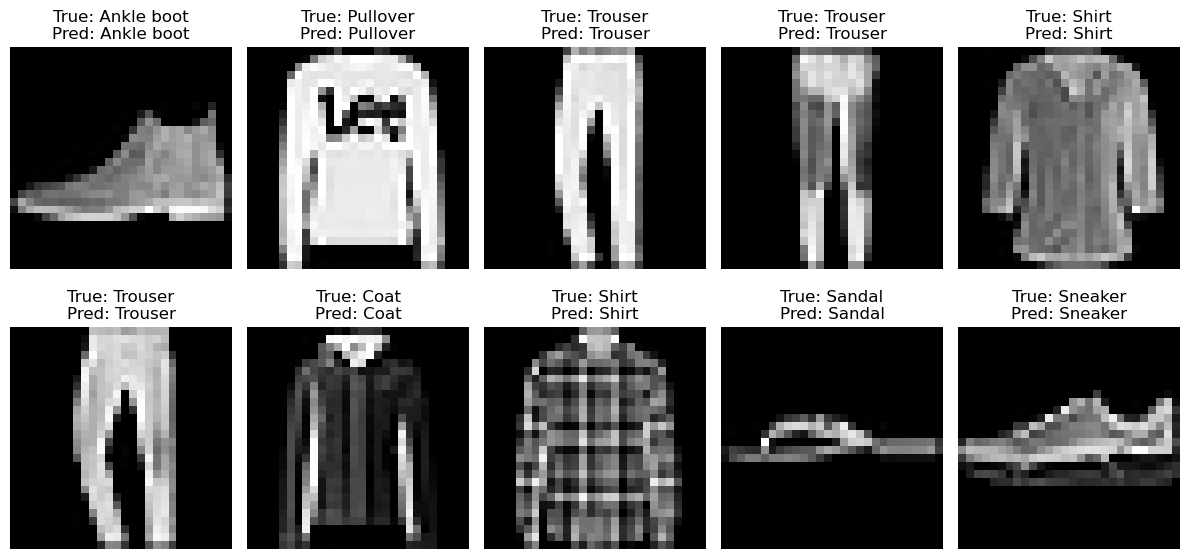

In [12]:
# Predict and visualize sample results
def show_predictions(model, x_test, y_test):
    preds = model.predict(x_test)
    pred_classes = np.argmax(preds, axis=1)

    plt.figure(figsize=(12, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        plt.title(f"True: {class_names[y_test[i]]}\nPred: {class_names[pred_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_predictions(model, x_test, y_test)

# ResNet (DNN) Example for Fashion MNIST Dataset

In [17]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

def create_dnn():
    inputs = Input(shape=(784,))
    x = Dense(256, activation='relu')(inputs)
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    outputs = Dense(10, activation='softmax')(x)
    return Model(inputs, outputs)

In [18]:
dnn_model = create_dnn()

In [22]:
dnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
from tensorflow.keras.datasets import fashion_mnist

# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Flatten and normalize
x_train_flat = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test_flat = x_test.reshape(-1, 784).astype('float32') / 255.0


dnn_history = dnn_model.fit(x_train_flat, y_train, 
                            epochs=10, 
                            batch_size=128, 
                            validation_split=0.2,
                            verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.7485 - loss: 0.7480 - val_accuracy: 0.8374 - val_loss: 0.4497
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8585 - loss: 0.3883 - val_accuracy: 0.8695 - val_loss: 0.3713
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8702 - loss: 0.3464 - val_accuracy: 0.8792 - val_loss: 0.3357
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8811 - loss: 0.3190 - val_accuracy: 0.8781 - val_loss: 0.3375
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8923 - loss: 0.2877 - val_accuracy: 0.8819 - val_loss: 0.3182
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.8994 - loss: 0.2756 - val_accuracy: 0.8871 - val_loss: 0.3211
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9016 - loss: 0.2611 - val_accuracy: 0.8863 - val_loss: 0.3135
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9045 - loss: 0.2539 - val_accur

In [26]:
# ResNet-style DNN Model (with residual connections)

from tensorflow.keras.layers import Input, Dense, Add, Activation


def create_resnet_dnn():
    inputs = Input(shape=(784,))
    
    # Initial dense layer
    x = Dense(256, activation='relu')(inputs)
    
    # Residual block 1
    x1 = Dense(256, activation='relu')(x)
    x2 = Dense(256, activation='relu')(x1)
    res1 = Add()([x, x2])  # Skip connection
    res1 = Activation('relu')(res1)
    
    # Residual block 2
    x3 = Dense(128, activation='relu')(res1)
    x4 = Dense(128, activation='relu')(x3)
    # Need to match dimensions for the skip connection
    res1_down = Dense(128, activation='relu')(res1)  # Projection to match dimensions
    res2 = Add()([res1_down, x4])
    res2 = Activation('relu')(res2)
    
    # Final layers
    x_final = Dense(64, activation='relu')(res2)
    outputs = Dense(10, activation='softmax')(x_final)
    
    return Model(inputs, outputs)

In [27]:
resnet_model = create_resnet_dnn()

In [31]:
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
from tensorflow.keras.datasets import fashion_mnist

# Load data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Flatten and normalize
x_train_flat = x_train.reshape(-1, 784).astype('float32') / 255.0
x_test_flat = x_test.reshape(-1, 784).astype('float32') / 255.0


resnet_history = resnet_model.fit(x_train_flat, y_train, 
                                 epochs=10, 
                                 batch_size=128, 
                                 validation_split=0.2,
                                 verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 22ms/step - accuracy: 0.7395 - loss: 0.7511 - val_accuracy: 0.8410 - val_loss: 0.4369
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.8579 - loss: 0.3863 - val_accuracy: 0.8603 - val_loss: 0.3824
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.8721 - loss: 0.3498 - val_accuracy: 0.8745 - val_loss: 0.3410
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8860 - loss: 0.3103 - val_accuracy: 0.8792 - val_loss: 0.3372
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.8905 - loss: 0.2951 - val_accuracy: 0.8756 - val_loss: 0.3360
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8955 - loss: 0.2723 - val_accuracy: 0.8813 - val_loss: 0.3333
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9057 - loss: 0.2557 - val_accuracy: 0.8802 - val_loss: 0.3389
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9044 - loss: 0.2509 - v

In [33]:
# Plot training history
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    
    plt.show()

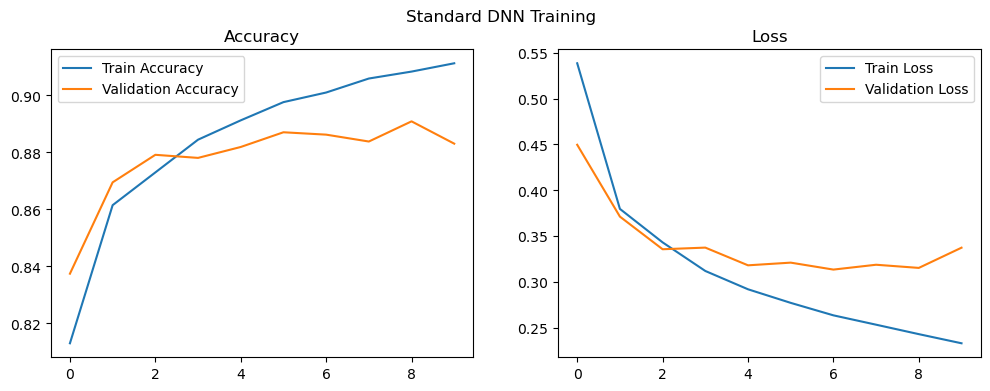

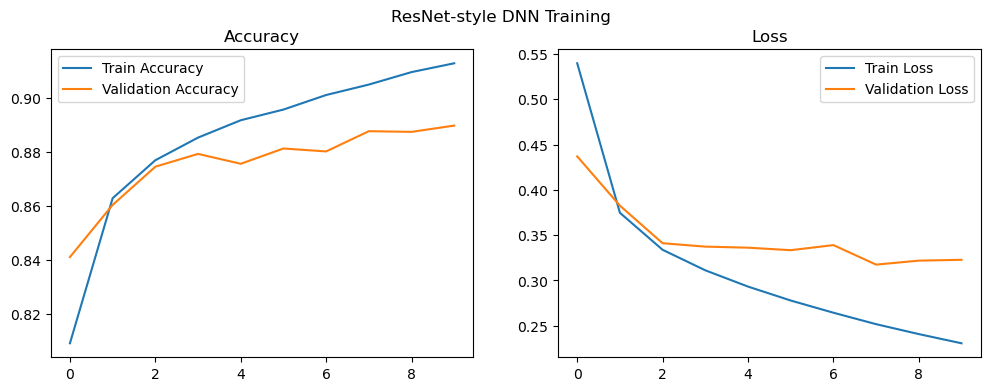

In [34]:
plot_history(dnn_history, 'Standard DNN Training')
plot_history(resnet_history, 'ResNet-style DNN Training')

In [35]:
# Evaluate on test set
dnn_test_loss, dnn_test_acc = dnn_model.evaluate(x_test_flat, y_test, verbose=0)
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(x_test_flat, y_test, verbose=0)

In [36]:
print(f"Standard DNN Test Accuracy: {dnn_test_acc:.4f}")
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

Standard DNN Test Accuracy: 0.8746
ResNet-style DNN Test Accuracy: 0.8862


In [46]:
import numpy as np
import matplotlib.pyplot as plt

# 10 Fashion-MNIST class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_predictions(model,
                     x_test_flat,         # <-- input to the model (N, 784)
                     x_test_images,       # <-- original images (N, 28, 28)
                     y_test,              # <-- integer labels (N,)
                     num_images=5):       # how many to show
    """Plot predictions vs. true labels for a few test images."""
    
    # Model probabilities
    probs = model.predict(x_test_flat, verbose=0)
    
    plt.figure(figsize=(15, 3 * num_images))
    
    for i in range(num_images):
        plt.subplot(num_images, 1, i + 1)
        plt.imshow(x_test_images[i], cmap='gray')
        
        pred_cls  = np.argmax(probs[i])
        true_cls  = y_test[i]
        confidence = np.max(probs[i])
        
        color = 'green' if pred_cls == true_cls else 'red'
        plt.xlabel(
            f"Predicted: {class_names[pred_cls]} ({pred_cls}) "
            f"[conf {confidence:.2f}]  |  "
            f"True: {class_names[true_cls]} ({true_cls})",
            color=color
        )
        plt.xticks([]); plt.yticks([])
    
    plt.tight_layout()
    plt.show()



Standard DNN Predictions:


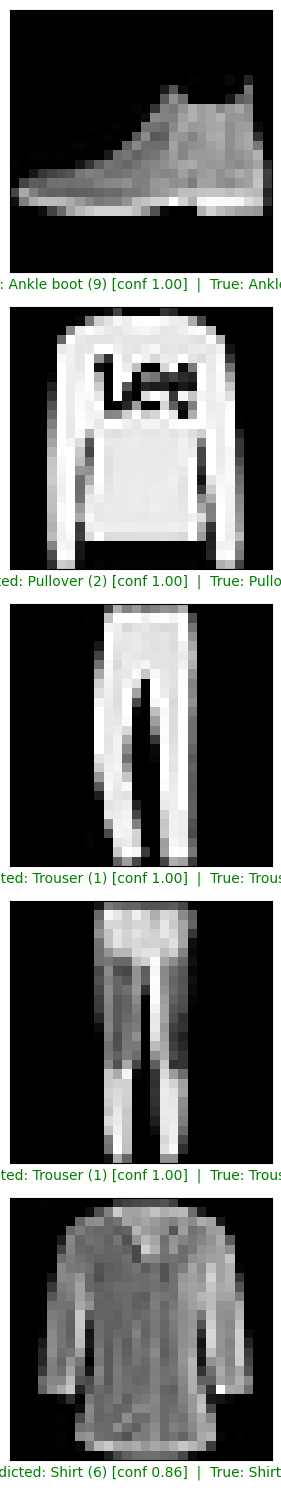


ResNet-style DNN Predictions:


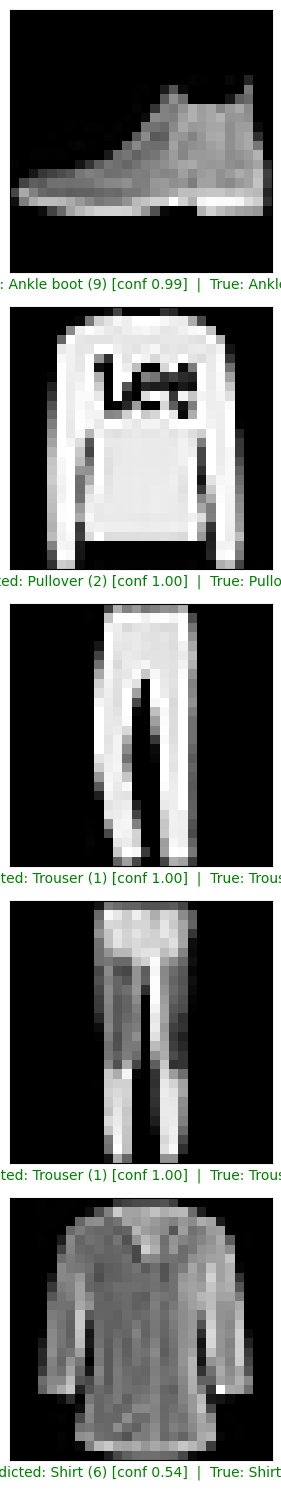

In [47]:
print("\nStandard DNN Predictions:")
plot_predictions(dnn_model, x_test_flat, x_test, y_test)

print("\nResNet-style DNN Predictions:")
plot_predictions(resnet_model, x_test_flat, x_test, y_test)